In [103]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [104]:
df = pd.read_csv('bol_sales.csv')
df.head()

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol
0,person_1,female,7065,4.6,30,105,117,1232
1,person_2,female,23028,9.8,23,81,70,1396
2,person_3,female,103377,9.2,11,38,94,1240
3,person_4,female,9815,3.2,16,54,124,720
4,person_5,female,22646,10.1,21,78,119,1379


In [105]:
dummies = pd.get_dummies(df['gender'])
df_dummie = pd.concat([df,dummies], axis=1)
df_dummie.head()

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol,female,male
0,person_1,female,7065,4.6,30,105,117,1232,1,0
1,person_2,female,23028,9.8,23,81,70,1396,1,0
2,person_3,female,103377,9.2,11,38,94,1240,1,0
3,person_4,female,9815,3.2,16,54,124,720,1,0
4,person_5,female,22646,10.1,21,78,119,1379,1,0


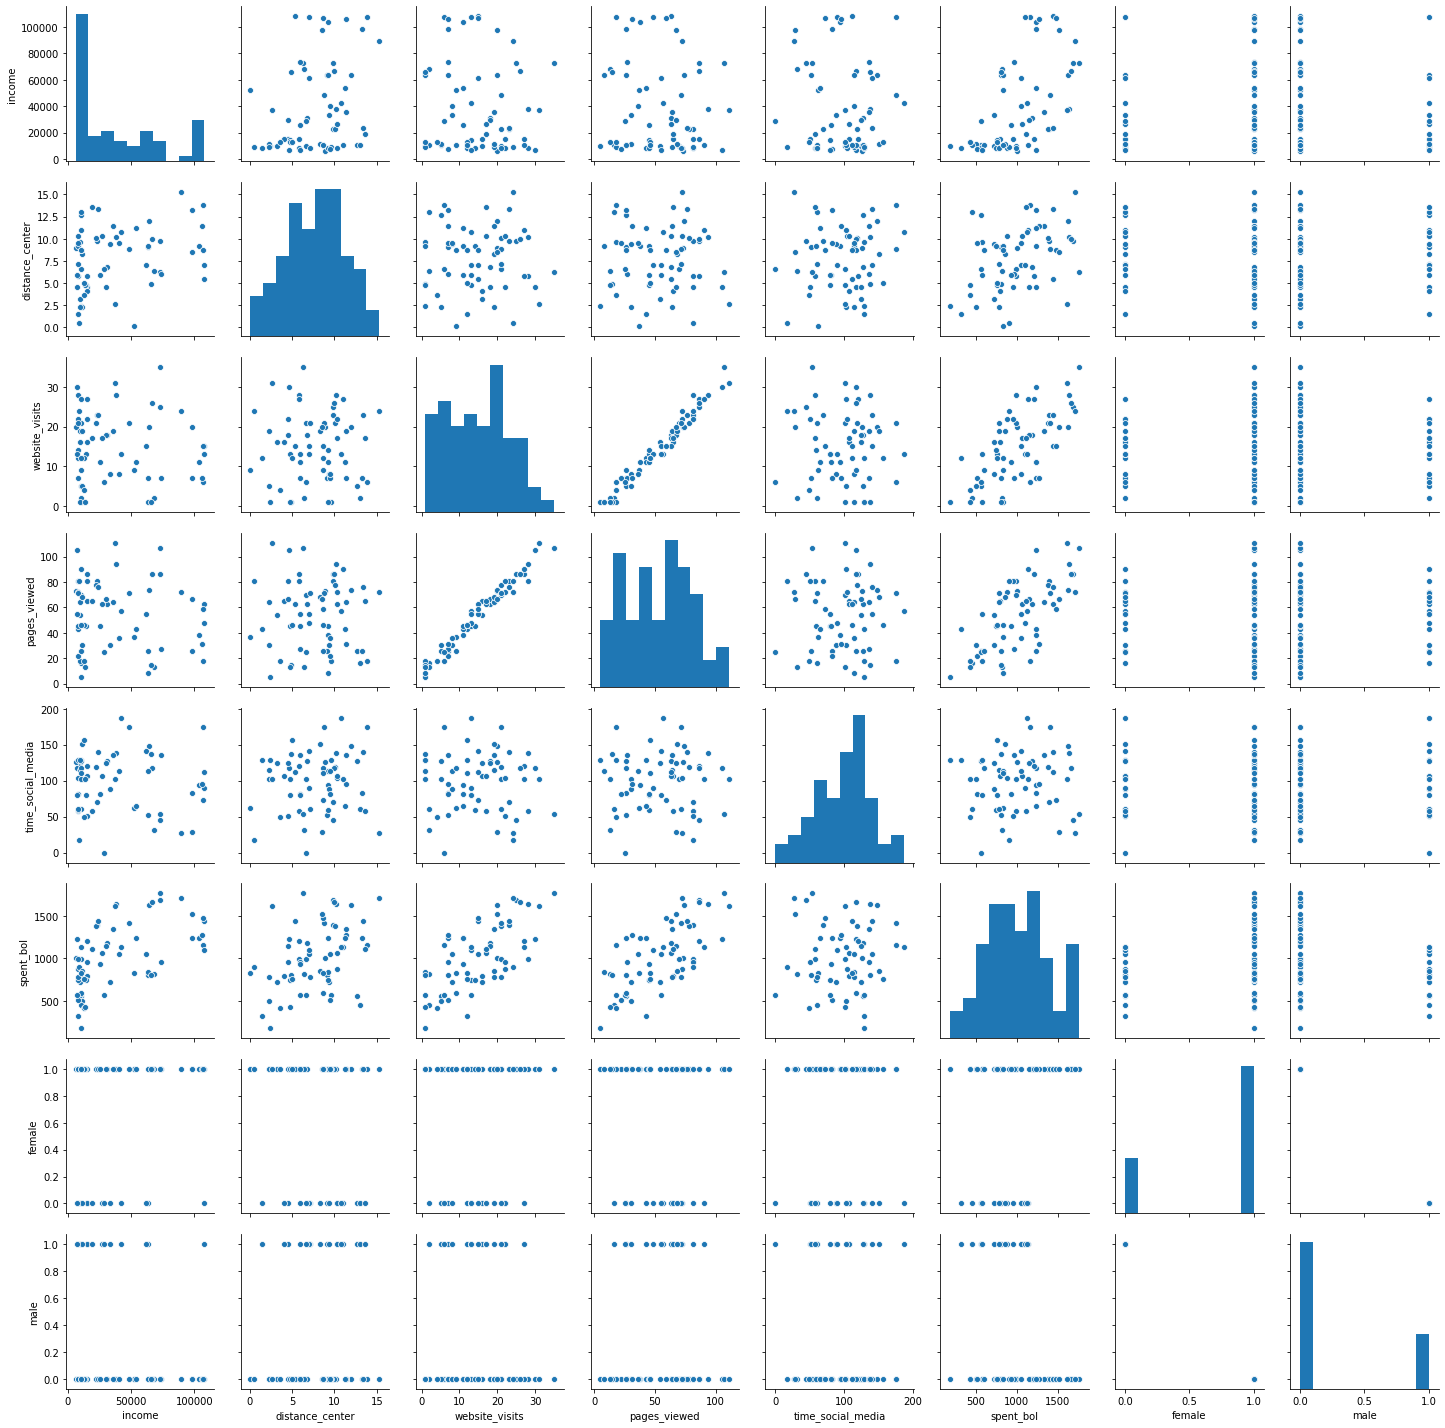

In [106]:
sns.pairplot(df_dummie)
plt.show() #using Matplotlib to show the plot

In [119]:
df_dummie.corr()

,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol,female,male
income,1.000000,0.298612,-0.085088,-0.095738,-0.065139,0.565621,0.203439,-0.203439
distance_center,0.298612,1.000000,0.006597,-0.016633,0.093626,0.392954,-0.120435,0.120435
website_visits,-0.085088,0.006597,1.000000,0.983754,-0.035425,0.677874,0.051172,-0.051172
pages_viewed,-0.095738,-0.016633,0.983754,1.000000,-0.000302,0.682696,0.012216,-0.012216
time_social_media,-0.065139,0.093626,-0.035425,-0.000302,1.000000,0.034558,0.070106,-0.070106
spent_bol,0.565621,0.392954,0.677874,0.682696,0.034558,1.000000,0.305343,-0.305343
female,0.203439,-0.120435,0.051172,0.012216,0.070106,0.305343,1.000000,-1.000000
male,-0.203439,0.120435,-0.051172,-0.012216,-0.070106,-0.305343,-1.000000,1.000000


In [107]:
df_subset = df_dummie[['distance_center', 'website_visits', 'pages_viewed', 'income', 'female', 'male']]
df_subset.head()

,distance_center,website_visits,pages_viewed,income,female,male
0,4.6,30,105,7065,1,0
1,9.8,23,81,23028,1,0
2,9.2,11,38,103377,1,0
3,3.2,16,54,9815,1,0
4,10.1,21,78,22646,1,0


In [108]:
y = df_dummie['spent_bol'] #We need to take out the spent_bol as our Y-variable
X = df_subset
X.index = df_dummie['id']
X.head()

,distance_center,website_visits,pages_viewed,income,female,male
id,,,,,,
person_1,4.6,30,105,7065,1,0
person_2,9.8,23,81,23028,1,0
person_3,9.2,11,38,103377,1,0
person_4,3.2,16,54,9815,1,0
person_5,10.1,21,78,22646,1,0


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data into training and test set, store it into different variables
X_train.head() #show the train data

,distance_center,website_visits,pages_viewed,income,female,male
id,,,,,,
person_11,10.2,28,94,38084,1,0
person_60,5.9,11,45,25821,1,0
person_20,6.8,18,63,31230,1,0
person_35,9.4,8,30,33405,0,1
person_64,5.9,13,55,7090,0,1


In [110]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [111]:
y_pred = lm.predict(X_test) #generate the predictions
resid = y_pred - y_test #get the residuals by substracting the prediction

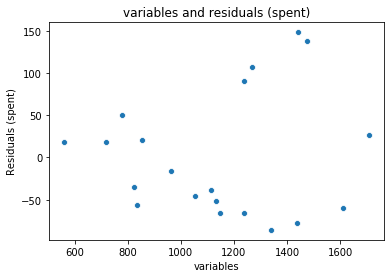

In [112]:
sns.scatterplot(x=y_test,y=resid, data=df_dummie)
plt.xlabel("variables")
plt.ylabel('Residuals (spent)')
plt.title('variables and residuals (spent)')
plt.show()

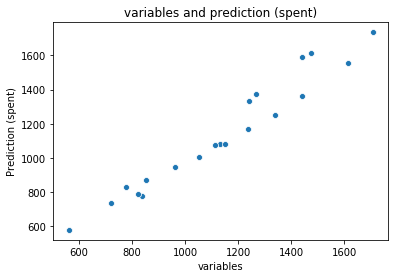

In [113]:
sns.scatterplot(x=y_test,y=y_pred, data=df_dummie)
plt.xlabel("variables")
plt.ylabel('Prediction (spent)')
plt.title('variables and prediction (spent)')
plt.show()

In [116]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.9456491910377343

In [117]:
math.sqrt(mean_squared_error(y_test, y_test_p)) #calculate the RMSE

71.26113778390598

The RMSE is 71. Which means that we are typically about 71 off in our predicted spent.

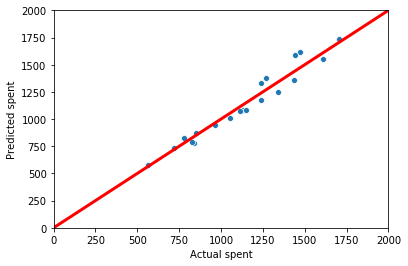

In [118]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual spent')
plt.ylabel('Predicted spent')
plt.xlim([0,2000]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([0,2000])
plt.plot([0,2000], [0,2000], color='red', lw=3) #Plot a diagonal length
plt.show()